# Домашнее задание: MNIST

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, InputLayer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# function for preprocessing MNIST
def load_mnist(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # normalizing X
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # putting the last 10000 training examples aside for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist()
y_train, y_val, y_test = map(keras.utils.np_utils.to_categorical, [y_train, y_val, y_test])

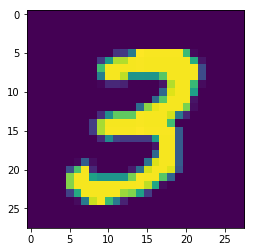

In [5]:
plt.imshow(X_train[7]);

In [6]:
# constructing the model
model = Sequential()
model.add(InputLayer([28, 28]))
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(.3))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(.2))
model.add(BatchNormalization())
model.add(Dense(250, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(.1))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
__________

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 28s 570us/step - loss: 0.2968 - acc: 0.9076 - val_loss: 0.1155 - val_acc: 0.9660
Epoch 2/10
50000/50000 [==============================] - 25s 508us/step - loss: 0.1790 - acc: 0.9445 - val_loss: 0.0899 - val_acc: 0.9717
Epoch 3/10
50000/50000 [==============================] - 25s 502us/step - loss: 0.1494 - acc: 0.9535 - val_loss: 0.0884 - val_acc: 0.9727
Epoch 4/10
50000/50000 [==============================] - 25s 507us/step - loss: 0.1287 - acc: 0.9602 - val_loss: 0.0768 - val_acc: 0.9771
Epoch 5/10
50000/50000 [==============================] - 25s 509us/step - loss: 0.1142 - acc: 0.9639 - val_loss: 0.0826 - val_acc: 0.9764
Epoch 6/10
50000/50000 [==============================] - 25s 502us/step - loss: 0.1052 - acc: 0.9663 - val_loss: 0.0760 - val_acc: 0.9768
Epoch 7/10
50000/50000 [==============================] - 25s 508us/step - loss: 0.0965 - acc: 0.9703 - val_loss: 0.

In [9]:
predictions = model.predict_proba(X_test).argmax(axis=-1)
answers = y_test.argmax(axis=-1)
print(f'Test accuracy: {np.mean(predictions == answers) * 100:.2f}%')

Test accuracy: 98.07%


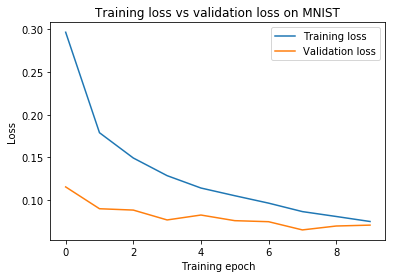

In [10]:
plt.plot(range(10), history.history['loss'], label='Training loss')
plt.plot(range(10), history.history['val_loss'], label='Validation loss')
plt.xlabel('Training epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training loss vs validation loss on MNIST');

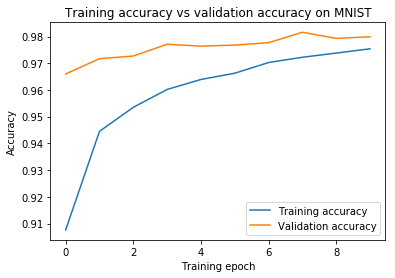

In [11]:
plt.plot(range(10), history.history['acc'], label='Training accuracy')
plt.plot(range(10), history.history['val_acc'], label='Validation accuracy')
plt.xlabel('Training epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training accuracy vs validation accuracy on MNIST');